# Multiple Linear Regression- Bike Sharing Case Study

### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

The company wants below analysis-

* To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

* To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of  bathrooms, etc.

* To know the accuracy of the model, i.e. how well these variables can predict house prices.

The regression code is divided into following steps-

* Step 1: Load the data and make understanding of the data.
* Step 2: Visualising the Data.
* Step 3: Data Preparation.
* Step 4: Splitting the Data into Training and Testing Sets.
* Step 5: Building a linear model.
* Step 6: Residual analysis of the train data.
* Step 7: Model Evaluation.

## Import Necessary Libraries

In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## Step 1: Load the data and make understanding of the data

In [37]:
# Read the dataset and check the head for intial look
bike_df = pd.read_csv("day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Shape of the dataset

In [13]:
# Checking the number of rows and columns
bike_df.shape

(730, 16)

#### Information about the dataset

In [41]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Insight:

 * The dataset has total of 730 rows and 16 columns.
 * Almost all the fields are of int or float data type except one which is dteday having object type
 * There are no NULL columns on the dataset

#### Check for duplicate values

In [44]:
# Check for the duplicates after taking copy of the dataset

bike_df_dup = bike_df
bike_df_dup.drop_duplicates(subset=None, inplace=True)

In [45]:
bike_df_dup.shape

(730, 16)

#### Insight:
* There are no duplicate rows found in the dataset since the rows and columns are same after using the drop duplicate command

#### Summary of the dataset

In [46]:
# Get an overview of the data in terms of statistics
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Insight:
 * Some of the columns are categorical in nature therefore we would need to check if these need to be converted or not. We can also confirm this after plotting histogram
 

# Step 2: Visualising the Data

### Plot Histogram to understand the occurence of values

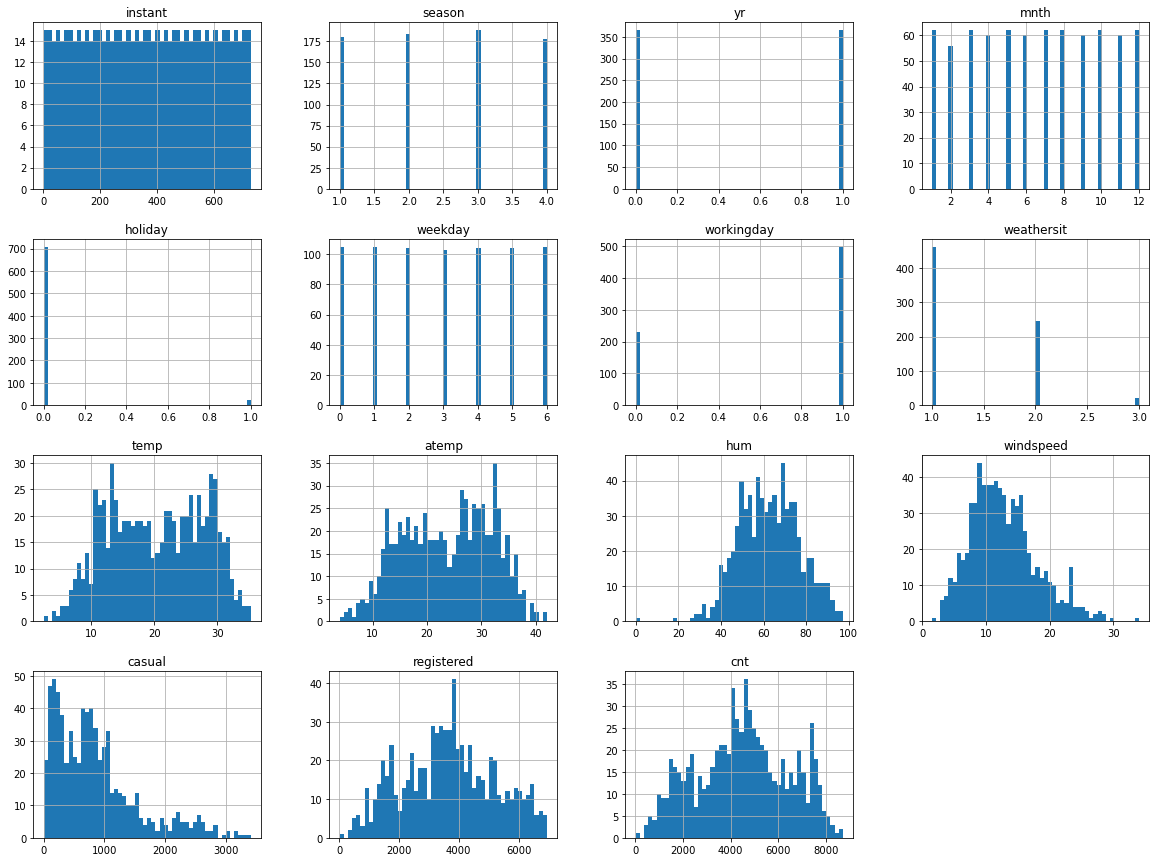

In [47]:
bike.hist(bins=50, figsize=(20,15))
plt.show()

### Insight

* The columns season, yr, mnth, holiday, weekday, workingday, weathersit do not have a varying graph therefore these are categorical variables as shown in the histograph

### Data Cleaning
#### Removing the unwanted and unnecessary columns . Below columns can be removed-
1. Instant - This is showing index so can be removed
2. Columns 'casual' , 'registered' can be removed as they add up to make the 'cnt' column
3. Column 'dteday' can also be removed as it won't be needed in the analysis.


In [221]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [222]:
# Make copy of the data set and then create a new data frame

bike_new = bike_df
bike_new= bike_df.drop(['instant', 'casual', 'registered' , 'dteday'], axis = 1)
bike_new.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [124]:
# Checking the number of rows and columns after deleting 4 columns
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 90.3 KB


## Visualize the data after cleanup

### Draw pair Plots to check if any linear relationship exists between the 'cnt' column and other columns

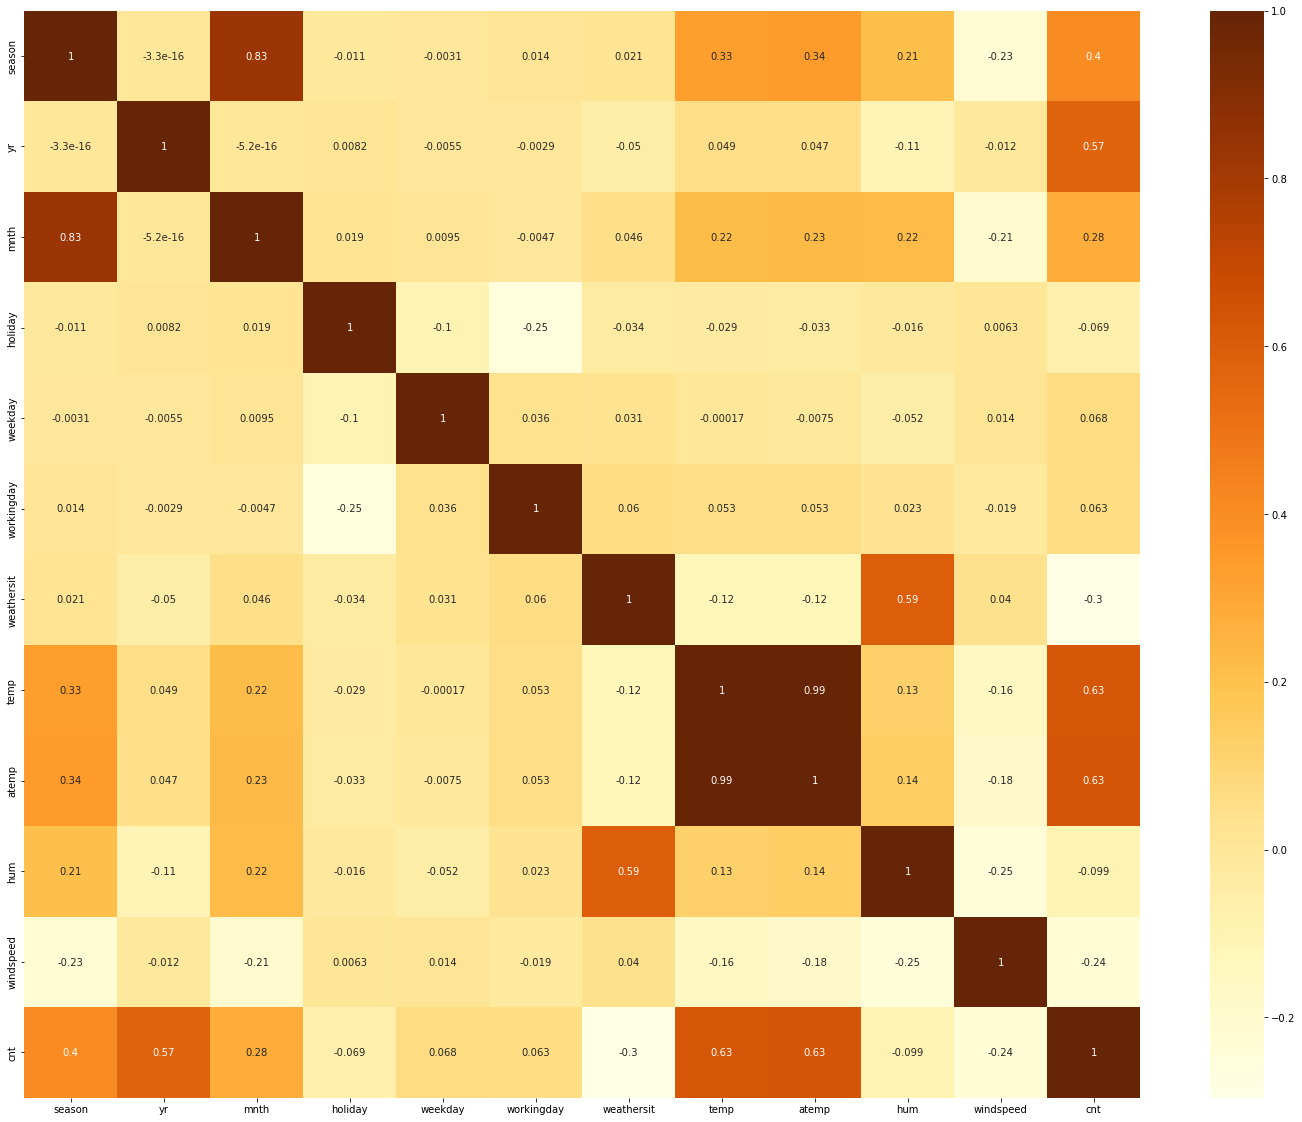

In [110]:
plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True,cmap="YlOrBr")
plt.show()

### Findings of the heat map- 
* The heat map shows '0.63' correlation between columns 'cnt' with 'temp' and  'cnt' with 'atemp' which is quite good factor to proceed with creating the model

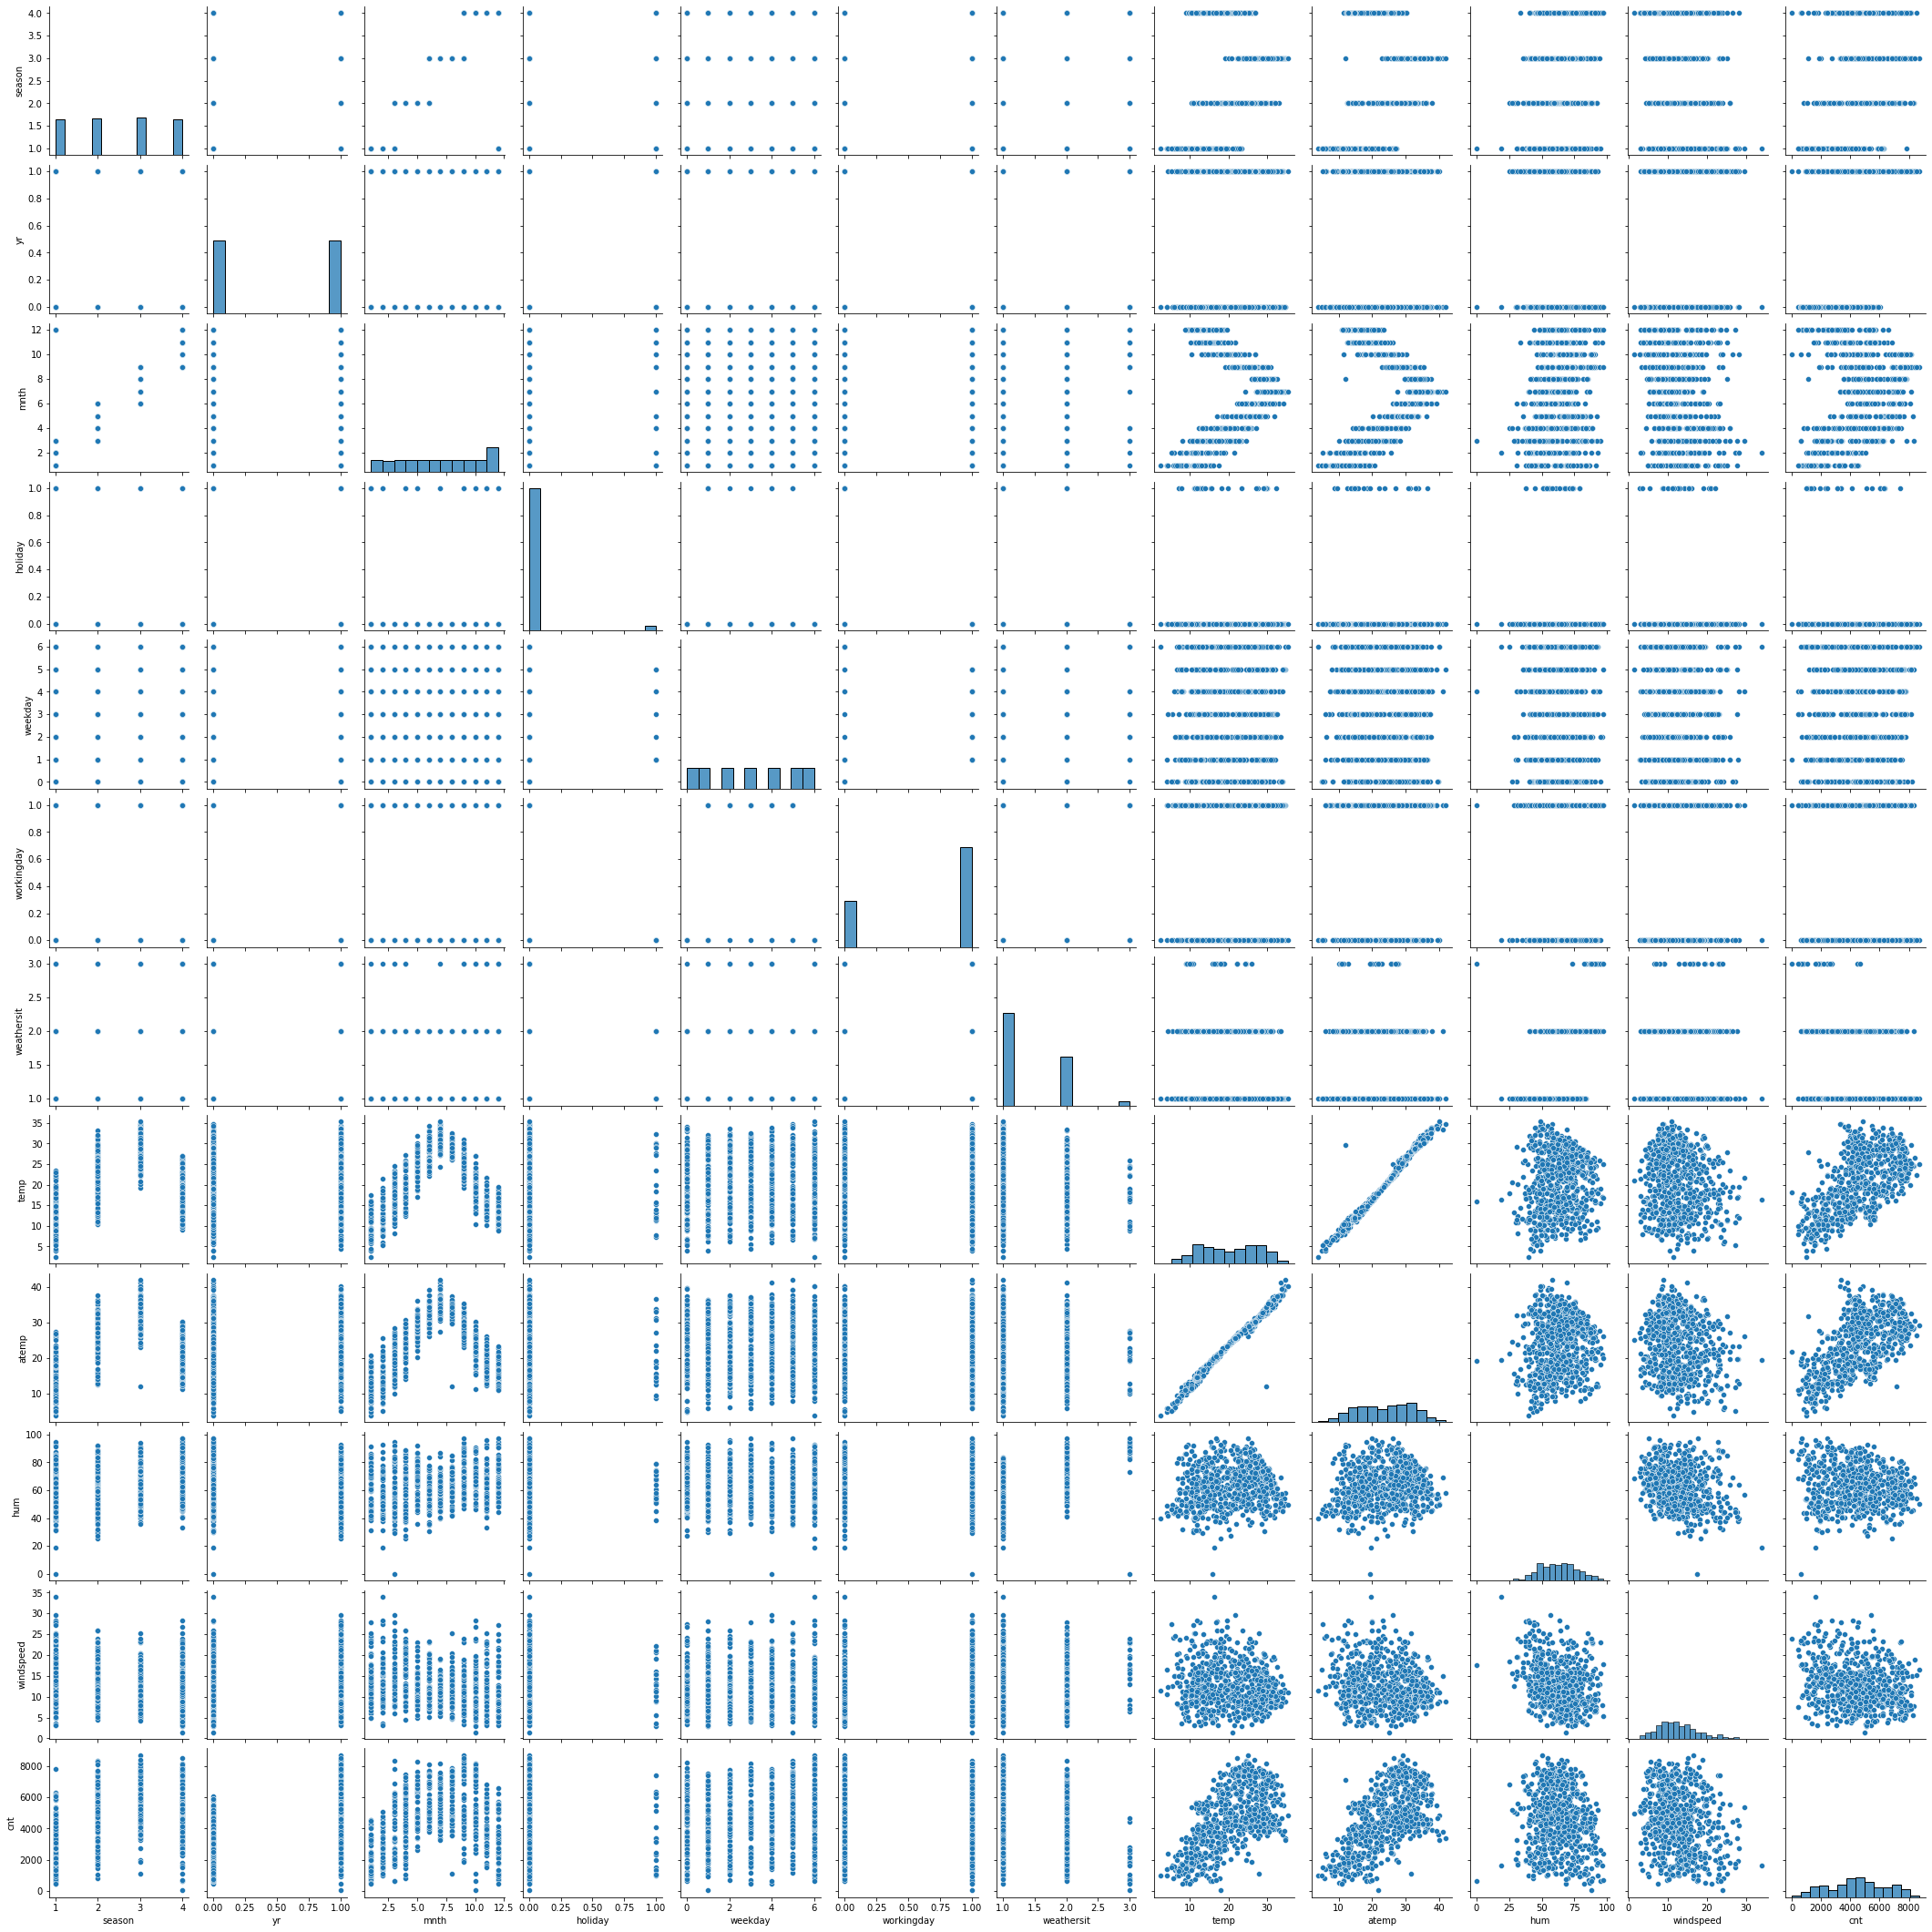

In [101]:
sns.pairplot(bike_new)
plt.show()

### Findings of the pair plot-

* There is linear relationship between columns 'temp' , 'atemp' and 'cnt' so regression is possible.


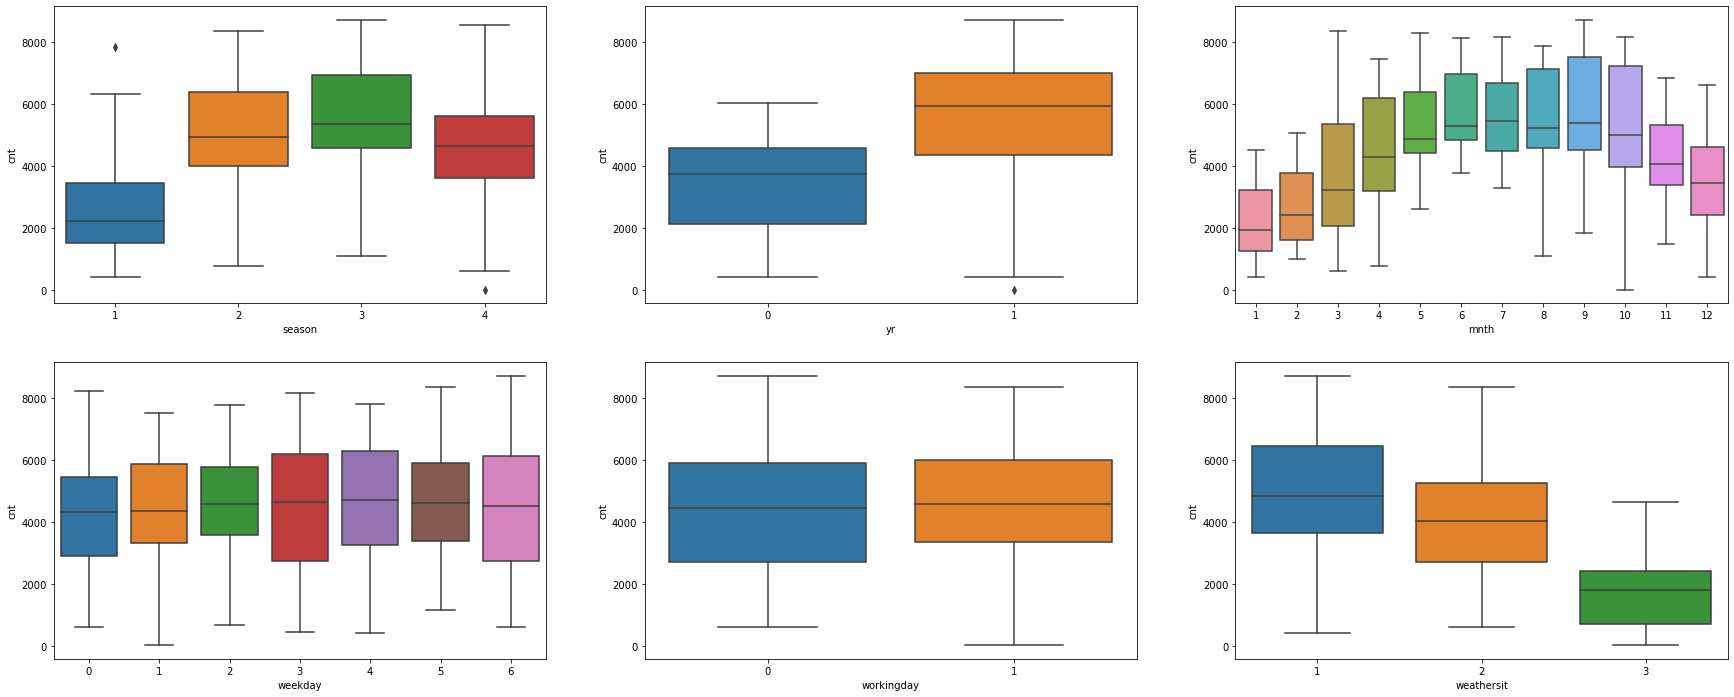

In [123]:
# visualizing the categorical value through boxplot
plt.figure(figsize=(30, 12))
plt.subplot(2, 3, 1)
sns.boxplot(x='season', y='cnt', data=bike_new)

plt.subplot(2, 3, 2)
sns.boxplot(x='yr', y='cnt', data=bike_new)

plt.subplot(2, 3, 3)
sns.boxplot(x='mnth', y='cnt', data=bike_new)

plt.subplot(2, 3, 4)
sns.boxplot(x='weekday', y='cnt', data=bike_new)

plt.subplot(2, 3, 5)
sns.boxplot(x='workingday', y='cnt', data=bike_new)

plt.subplot(2, 3, 6)
sns.boxplot(x='weathersit', y='cnt', data=bike_new)

plt.show()

### Findings from the box plot-

* There are large number of bike counts during season 3(Fall)
* The year 2019 has higher number of bike counts compared to 2018
* The bikes are registered more during Aug, Sept, October months which is near to Fall season and decrease during winters( Nov to Feb)
* People prefer bikes when weather is clear and few clouds.

# Step 3: Data Preparation

In [226]:
#preparing categorial data to descriptive so it is easy to understand

bike_new.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_new.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_new.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}, inplace = True)

bike_new.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


### Convert the categorical variables type to category types

In [227]:
bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')

In [228]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 71.4 KB


### Create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'. 

In [387]:
# Creating dummies of the converted variables and dropping the first variable as (n-1) 
# factors are needed for the dummy variables.
bike_new = pd.get_dummies(bike_new,drop_first=True)
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,1,0


In [386]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_spring        730 non-null    uint8  
 9   season_summer        730 non-null    uint8  
 10  season_winter        730 non-null    uint8  
 11  mnth_aug             730 non-null    uint8  
 12  mnth_dec             730 non-null    uint8  
 13  mnth_feb             730 non-null    uint8  
 14  mnth_jan             730 non-null    uint8  
 15  mnth_jul             730 non-null    uin

In [385]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,1,0


# Step 4: Splitting the Data into Training and Testing Sets

In [231]:
# Checking the shape of dataset before splitting

bike_new.shape

(730, 30)

In [324]:
bike_train, bike_test = train_test_split(bike_new, train_size=0.70, test_size=0.30, random_state=100)

In [325]:
bike_train.shape

(510, 30)

In [234]:
bike_test.shape

(219, 30)

In [326]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,1,0,1,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1


### Insight :
* Data has been spilted in 70:30. There are 510 columns in train set and 219 in test set. We would now continue our analysis on the train dataset

### Re-scaling the Train data set using MinMax scaling.

In [327]:
# 1. Instantiate an object
scaler = MinMaxScaler()


In [328]:
# 2. Create list of numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [329]:
# 3. Apply scaler() to all the numeric variables
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [148]:
# Checking values after scaling

In [330]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


### Dividing into X and Y sets for the model building

In [331]:
y_train = bike_train.pop('cnt')  # only cnt is saved here
X_train = bike_train             # rest of the fields are in X_train

In [332]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,1,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [333]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

# Step 5: Building a linear model

## Create Model using RFE(Recursive feature elimination) as there are many columns to consider

We will Use RFE to pick 10 fields and also use manual method to verify and remove variables. We will use below method to remove variables -

* High p-value and high VIF

* High - low
    * High p-value and low VIF
    * Low p-value and high VIF
* Low p-value and low VIF

In [296]:
# Include RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [334]:
# Performing RFE with the output number of the variable = 10

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=10)         
rfe = rfe.fit(X_train, y_train)


In [335]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', False, 2),
 ('mnth_aug', False, 12),
 ('mnth_dec', False, 8),
 ('mnth_feb', False, 9),
 ('mnth_jan', False, 6),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 19),
 ('mnth_mar', False, 20),
 ('mnth_may', False, 11),
 ('mnth_nov', False, 7),
 ('mnth_oct', False, 16),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 14),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 13),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 15),
 ('weekday_wed', False, 18),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [336]:
# Storing the 'True' columns from the rfe.support_ list / # fitting the data with the training dataset
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'mnth_jul', 'mnth_sept', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [337]:
# Having a look to the columns that haven't been taken by the rfe.support_

X_train.columns[~rfe.support_]


Index(['workingday', 'atemp', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jun', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [353]:
# Creating X_test df with the RFE selected vars.

X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,season_spring,mnth_jul,mnth_sept,weathersit_good,weathersit_moderate
653,1,0,0.509887,0.575354,0.300794,0,0,0,1,0
576,1,0,0.815169,0.725633,0.264686,0,1,0,1,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0
482,1,0,0.395666,0.504508,0.188475,0,0,0,0,1


## Model 1

In [354]:
# VIF Check

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,hum,16.24
2,temp,13.50
8,weathersit_good,11.27
9,weathersit_moderate,7.88
4,windspeed,4.22
0,yr,2.07
5,season_spring,2.07
6,mnth_jul,1.40
7,mnth_sept,1.20
1,holiday,1.04


In [355]:
    X_train_sm1 = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train, X_train_sm1).fit()
    print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     246.6
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          6.44e-186
Time:                        12:37:32   Log-Likelihood:                 492.94
No. Observations:                 510   AIC:                            -963.9
Df Residuals:                     499   BIC:                            -917.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1431    

### Model 2- Drop varaible humidity(hum)

* Removing the variable hum based on the high VIF

In [357]:
# Dropping the 'hum' columns because of its high VIF Value and high P value.

X_train_new = X_train_rfe.drop(['hum'], axis=1)

In [358]:
# VIF Check

# Creating a dataframe that'll contain the names of all the feature variable & their respective VIF's

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,temp,10.85
7,weathersit_good,9.18
8,weathersit_moderate,5.06
3,windspeed,4.19
0,yr,2.07
4,season_spring,2.01
5,mnth_jul,1.37
6,mnth_sept,1.20
1,holiday,1.04


In [360]:
# Adding a constant

X_train_sm2 = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_sm2).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     267.5
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          8.40e-185
Time:                        12:42:41   Log-Likelihood:                 487.41
No. Observations:                 510   AIC:                            -954.8
Df Residuals:                     500   BIC:                            -912.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0303    

### Model 3 - Dropping the next variable with HIGH VIF value

In [361]:
# Dropping the 'weathersit_good' column because of its high VIF Value.

X_train_new = X_train_new.drop(['weathersit_good'], axis=1)

In [362]:
# VIF Check

# Creating a dataframe that'll contain the names of all the feature variable & their respective VIF's

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,3.72
0,yr,2.03
4,season_spring,1.52
7,weathersit_moderate,1.47
5,mnth_jul,1.33
6,mnth_sept,1.20
1,holiday,1.03


In [363]:
# Adding a constant

X_train_sm3 = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_sm3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     229.9
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          2.74e-162
Time:                        12:46:34   Log-Likelihood:                 431.54
No. Observations:                 510   AIC:                            -845.1
Df Residuals:                     501   BIC:                            -807.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2854    

### Observation
This model is good based on the following observation
* The VIF values are less the 5
* The R-squared value is 0.786 and adjusted R square value is 0.782 which are acceptable
* There are less Multicollinearity between the predictors
* The p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).


## Model interpretation
#### A) Model coeff values

* const 0.2854 
* yr 0.2405
* holiday -0.0807
* temp 0.4148
* windspeed -0.1769
* season_spring 0.1323
* mnth_jul    -0.0773
* mnth_sept    0.0461 
* weathersit_moderate    -0.0687 

#### B) The equation of best fitted surface based on model: cnt = 0.2854 + (yr × 0.2405) + (holiday x -0.0807 ) + (temp x 0.4148 ) + (windspeed x -0.1769) + (season_spring x 0.1323 ) + (mnth_jul x -0.0773) + (mnth_sept x 0.0461) + (weathersit_moderate x -0.0687)

# Step 6 : Residual analysis of the train data


To check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

### Assumptions

#### 1.Error terms are normally distributed with mean zero

In [364]:
y_train_cnt = lm.predict(X_train_sm3)

Text(0.5, 0, 'Errors')

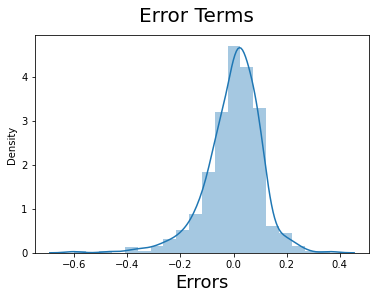

In [365]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label


#### 2. There is a linear relationship between X and Y

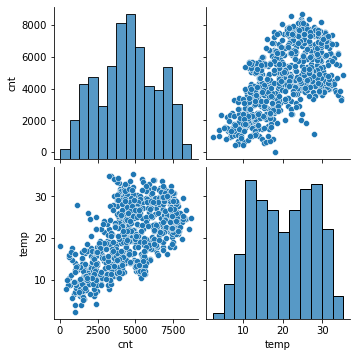

In [366]:
col_names = ['cnt','temp']

sns.pairplot(bike_df, vars = col_names)
plt.show()

#### 3. No Multicollinearity exists between the predictor variables

In [367]:
get_vif(X_train_new)

,Features,VIF
2,temp,4.60
3,windspeed,3.72
0,yr,2.03
4,season_spring,1.52
7,weathersit_moderate,1.47
5,mnth_jul,1.33
6,mnth_sept,1.20
1,holiday,1.03


## Making Predictions Using the Final Model

Applying the scaling on the test sets

In [368]:
# Using scaler.transform as we want our Test data to predict learned from the Training data.

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,1,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,1,0


In [373]:
# Descriptive statistics

bike_test.describe()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.652968,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.477117,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [374]:
# Make copy of bike_test
bike_test_copy_final= bike_test

### Dividing into X_test and y_test

In [375]:
y_test = bike_test.pop('cnt')
X_test = bike_test


In [376]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,1,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [377]:
# Selecting the variables

col1 = X_train_new.columns

X_test = X_test[col1]

In [378]:
# Adding constant variable to test df

X_test_new = sm.add_constant(X_test)
# Making Predictions using the final model

y_pred = lm.predict(X_test_new)

# Step 7:  Model Evaluation

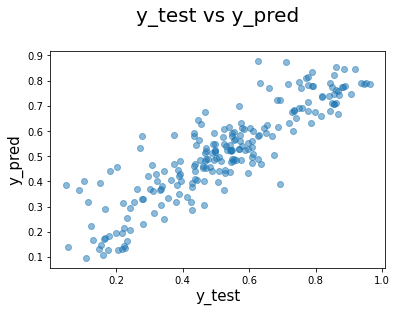

In [379]:
# Plotting y_test('cnt') and y_pred(output) to understand

plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('y_test vs y_pred\n', fontsize=20)
plt.xlabel('y_test', fontsize=15)
plt.ylabel('y_pred', fontsize=15)

plt.show()

## R^2 Value for Test data

In [380]:
r2_score(y_test, y_pred)

0.7754916701364188

### Adjusted R^2 Value for Test data

In [381]:
# Getting the shape of test data

X_test.shape


(219, 8)

In [382]:
# Formula for R^2 adjusted: R^2 adj. = (1−(1−R^2)∗(n−1)/(n−p−1))

# Here, n is the rows & p is the columns

n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)

adj_r2 = (1-(1-r2)*(n-1)/(n-p-1))
adj_r2


0.7669389718559014

## Final values of Train set VS Test set

### * Train R^2 =  0.786
### * Train Adjusted R^2 =  0.782
### * Test R^2 =  0.775
### * Test Adjusted R^2 = 0.766

### Result - This seems to be a really good model as the values of Train and Test data are close

# Step 8 :Conclusion and Final outcome from the regression

## 1. Analysing the above model, the company should focus on the following features:
* Company should focus on expanding business during Spring season. People tend to go for biking during this season since spring is not too hot and not too cold month.
* Company should focus on making more bikes during July and September. Therefore more no of bikes can be provided to people.
* Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to   2019.
* There would be less bookings during Light Snow or Rain, they could probably use this time to repair the bikes without having business impact.

## 2. As per our final Model, the top 5 predictor variables that influences the bike booking are:


* temp	0.4148	Indicates that a unit increase in temp variable increases the bike hire numbers by this many units

* season_spring	0.1323	Indicates that a unit increase in season_spring variable increase the bike hire numbers by this many  units

* windspeed	-0.1769	Indicates that a unit increase in windspeed variable decreases the bike hire numbers by this many units